# Monte Carlo Particle Simulation Example
In this example, we will construct a simple geometry to perform a "Monte Carlo" style particle simulation. For simplicity, a random walk will be used rather than actual physics. This example will also perform some basic plotting routines to help visualize the random walk of the particle.

## 1 - Create Geometry
We will use the same geometry as in the "Pincell" Example problem. See that example for more information on how to create a geometry.

In [1]:
using ConstructiveSolidGeometry

In [2]:
top =   Plane(Coord(0.0, 0.0, 150.0),  unitize(Coord(0.0, 0.0, 1.0)),  "reflective")
bot =   Plane(Coord(0.0, 0.0, -150.0), unitize(Coord(0.0, 0.0, -1.0)), "reflective")
left =  Plane(Coord(-.63, 0.0, 0.0),   unitize(Coord(-1.0, 0.0, 0.0)), "reflective")
right = Plane(Coord(0.63, 0.0, 0.0),   unitize(Coord(1.0, 0.0, 0.0)),  "reflective")
up =    Plane(Coord(0.0, 0.63, 0.0),   unitize(Coord(0.0, 1.0, 0.0)),  "reflective")
down =  Plane(Coord(0.0, -0.63, 0.0),  unitize(Coord(0.0, -1.0, 0.0)), "reflective")
clad_outer = InfCylinder(Coord(0.0, 0.0, 0.0), unitize(Coord(0.0, 0.0, 1.0)), 0.4750)
clad_inner = InfCylinder(Coord(0.0, 0.0, 0.0), unitize(Coord(0.0, 0.0, 1.0)), 0.4180)
fuel =       InfCylinder(Coord(0.0, 0.0, 0.0), unitize(Coord(0.0, 0.0, 1.0)), 0.4096)
cells = Array{Cell}(0)
regions = Array{Region}(0)
push!(regions, Region(top, -1))
push!(regions, Region(bot, -1))
push!(regions, Region(left, -1))
push!(regions, Region(right, -1))
push!(regions, Region(up, -1))
push!(regions, Region(down, -1))
push!(regions, Region(clad_outer, 1))
ex = :(1 ^ 2 ^ 3 ^ 4 ^ 5 ^ 6 ^ 7)
push!(cells, Cell(regions, ex))
regions = Array{Region}(0)
push!(regions, Region(top, -1))
push!(regions, Region(bot, -1))
push!(regions, Region(clad_outer, -1))
push!(regions, Region(clad_inner, 1))
ex = :(1 ^ 2 ^ 3 ^ 4)
push!(cells, Cell(regions, ex))
regions = Array{Region}(0)
push!(regions, Region(top, -1))
push!(regions, Region(bot, -1))
push!(regions, Region(clad_inner, -1))
push!(regions, Region(fuel, 1))
ex = :(1 ^ 2 ^ 3 ^ 4)
push!(cells, Cell(regions, ex))
regions = Array{Region}(0)
push!(regions, Region(top, -1))
push!(regions, Region(bot, -1))
push!(regions, Region(fuel, -1))
ex = :(1 ^ 2 ^ 3)
push!(cells, Cell(regions, ex))
bounding_box = Box(Coord(-.63, -.63, -150), Coord(.63, .63, 150))
geometry = Geometry(cells, bounding_box);

## 2 - Define Random Walk Routine
This routine performs a straw man random walk step by sampling a random distance for the particle to travel before changing direction. In a real application, this would of course have a lot of physics associated with it.

In [3]:
function move_particle(ray::Ray, geometry::Geometry)
    # Sample distance to travel
    distance_to_scatter = rand() * 0.75
    
    # Determine next intersection distance
    new_ray, id, boundary_type = find_intersection(ray, geometry)

    # Compute distance travelled by the ray
    distance_to_boundary = magnitude( new_ray.origin - ray.origin )
    
    # Check if scatter happened before boundary crossing
    if distance_to_scatter < distance_to_boundary
        # Sample new ray direction
        new_ray = generate_random_ray(geometry.bounding_box)
        
        # Move ray to correct location
        new_ray.origin = ray.origin + ray.direction * distance_to_scatter
    end
    
    return new_ray
end

move_particle (generic function with 1 method)

## 3 - Plot Random Walk of Single Particle

In [4]:
using Plots


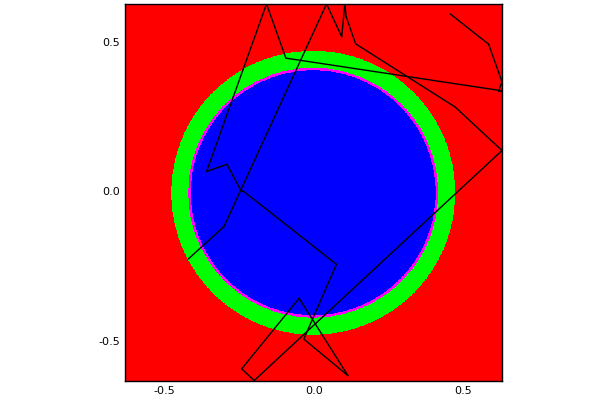

In [5]:
# Plot Background Geometry
plot_geometry_2D(geometry, Box(Coord(-0.63, -0.63, 0), Coord(.63, 0.63, 0)), 1000)

# Sample new particle
ray = generate_random_ray(geometry.bounding_box)
old_ray = generate_random_ray(geometry.bounding_box)

# Plot particle steps
for i=1:50
    ray = move_particle(old_ray, geometry)
    x = [old_ray.origin.x, ray.origin.x]
    y = [old_ray.origin.y, ray.origin.y]
    old_ray.origin = ray.origin
    old_ray.direction = ray.direction
    plot!(x, y, c=:black)
end

plot!()

## 4 - Plot paths of 100 particles, colored by cell id


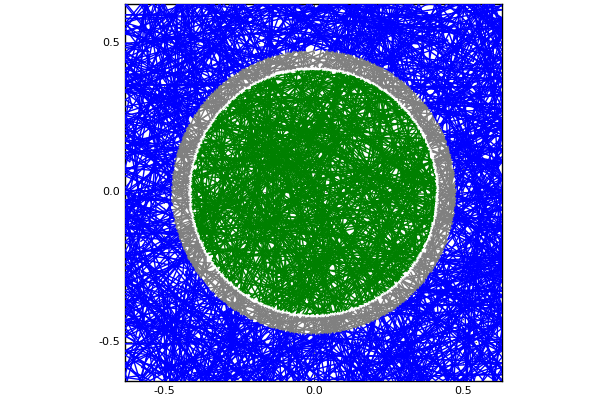

In [6]:
plot(leg=:false, aspect_ratio=1)

# Particle Loop
for i = 1:100
    
    # Randomly sample a new particle
    ray = generate_random_ray(geometry.bounding_box)
    old_ray = generate_random_ray(geometry.bounding_box)
    
    # Transport Loop
    for j=1:50
        
        # Move particle forward
        ray = move_particle(old_ray, geometry)
        
        # Generate lines to plot
        x = [old_ray.origin.x, ray.origin.x]
        y = [old_ray.origin.y, ray.origin.y]
        
        # Determine which cell the particle was travelling in
        id = find_cell_id(old_ray.origin, geometry)
        
        # Update particle
        old_ray.origin = ray.origin
        old_ray.direction = ray.direction
        
        # Plot line
        if id == 1
            plot!(x, y, c=:blue)
        elseif id == 2
            plot!(x, y, c=:grey)
        elseif id == 3
            plot!(x, y, c=:white)
        else
            plot!(x, y, c=:green)
        end
    end
end
plot!()